In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importer_snippets import biologic_mpt_voltammetry
from LinReg import PolyReg
import os
plt.style.use("JGW-PPT")

In [21]:
GC_submerged = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Control-Submerged_JGW2-08\omega-series_GC-Control-Submerged.xlsx", index_col=0)
GC_control = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Control-1.5mm_JGW2-08\omega-series_GC-Control.xlsx", index_col=0)

GC_variance = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Variance-1.5mm_JGW2-09\omega-series_GC-Variance-1.5mm_JGW2-09.xlsx", index_col=0)

GC_variance_2mm_17 = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Variance-2mm_JGW2-09-17\omega-series_GC-Variance-2mm_JGW2-09-17.xlsx")

GC_variance_2mm_23 = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Variance-2mm_JGW2-09-23\omega-series_GC-Variance-2mm_JGW2-09-23.xlsx")

GC_control_3mm = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Control-3mm_JGW2-08\omega-series_GC-Control-3mm_no-Outlier.xlsx", index_col=0)

GC_variance_3mm = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Variance-3mm_JGW2-09\omega-series_GC-Variance-3mm_JGW2-09.xlsx", index_col=0)

Broken_HOPG = pd.read_excel(r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\Cracked-HOPG_JGW2-07\omega-series_Cracked-HOPG.xlsx", index_col=0)

# df_list = [GC_submerged, GC_control, GC_variance, GC_variance_2mm_17, GC_variance_2mm_23, GC_control_3mm, GC_variance_3mm, Broken_HOPG]
df_list = [GC_submerged, GC_control, GC_variance, GC_variance_2mm_17, GC_variance_2mm_23, GC_control_3mm, GC_variance_3mm]

In [22]:
fit_list = []

for df in df_list:
    fit = PolyReg(df['omega0.5'], df['ilc'], 1)
    fit_list.append(fit)
# GC_submerged_fit = PolyReg(GC_submerged['omega0.5'], GC_submerged['ilc'], 1)
# GC_control_fit = PolyReg(GC_control['omega0.5'], GC_control['ilc'], 1)
# GC_control_3mm_fit = PolyReg(GC_control_3mm['omega0.5'], GC_control_3mm['ilc'], 1)
# Broken_HOPG_fit = PolyReg(Broken_HOPG['omega0.5'], Broken_HOPG['ilc'], 1)
# fit_list = [GC_submerged_fit, GC_control_fit, GC_control_3mm_fit, Broken_HOPG_fit]

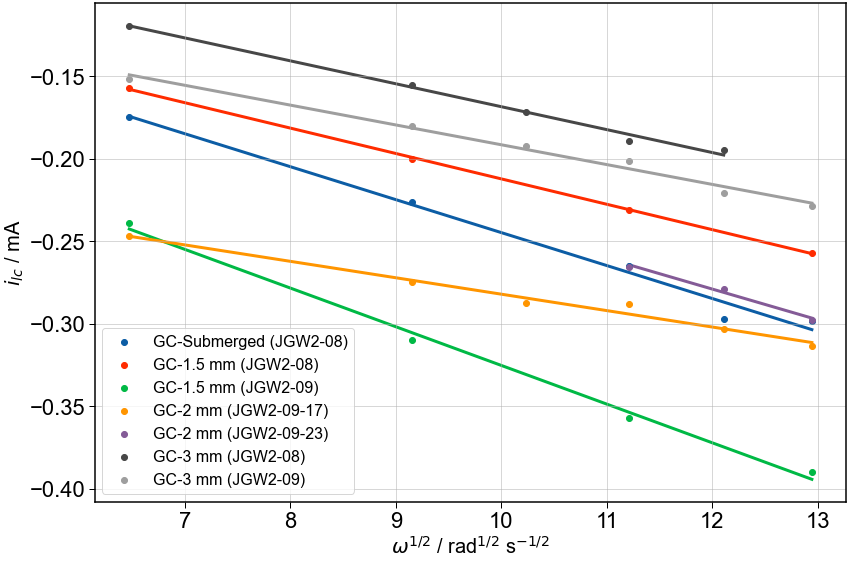

In [28]:
fig, ax = plt.subplots()

labels = ['GC-Submerged (JGW2-08)', 'GC-1.5 mm (JGW2-08)', 'GC-1.5 mm (JGW2-09)', 'GC-2 mm (JGW2-09-17)',
          'GC-2 mm (JGW2-09-23)', 'GC-3 mm (JGW2-08)', 'GC-3 mm (JGW2-09)', 'Broken-HOPG (JGW2-07)']
i = 0
for fit in fit_list:
    ax.scatter(fit.xdata, fit.ydata * 1000, label=labels[i]) # Plot in mA, fit in A
    ax.plot(fit.xdata, fit.eval(fit.xdata) * 1000, zorder=0) # Plot in mA, fit in A
    # ax.plot(np.linspace(0, np.max(x)), fit.eval(np.linspace(0, np.max(x))), label='Fit', color='C01')
    i += 1

ax.set_xlabel('$\omega^{1/2}$ / rad$^{1/2}$ s$^{-1/2}$')
ax.set_ylabel('$i_{lc}$ / mA')
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.legend(loc=(0.12,0.12))
fig.tight_layout()
plt.show()

fig.savefig('Control-Coplots_JGW2-09-31.png')